<a href="https://colab.research.google.com/github/eduardamota/curso-eba/blob/main/distribuicao_probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from scipy.stats import binom, norm
import math
import pandas as pd
import seaborn as sns
import numpy as np

Suponha que na minha loja 10% de todos os pedidos são devolvidos a cada semana. Se houver alta probabilidade de ter 3 ou mais devoluções por semana, precisamos contratar um assistente temporário. Suponha que naquela semana a loja realizou 50 vendas em uma semana. Qual é a probabilidade de ter que contratar um assistente temporário? X = Qtd de devolução, n=50 compras, p=probabilidade de devolução= 10%.

In [2]:
n=50
p=0.1
k=3
q=0.9

In [3]:
1-binom.cdf(k,n,p)

0.749706094046692

# Distribuição Contínua
Ex: Considerando que temos uma distribuição normal e que nosso x=20. Quantos dados estão abaixo de x=20? Suponha que a distribuição tem média=15 e desvio padrão=8,9.

In [4]:
z = (20-15)/8.9
z

0.5617977528089887

Uma pesquisa indica que, para cada ida ao supermercado, um consumidor permanece na loja em média 45 minutos, com desvio padrão de 12 minutos. A duração dos tempos gastos na loja é normalmente distribuída e representada pela varável x. Um consumidor entra na loja.
- a) Calcule a probabilidade de que ele ficará na loja, para cada intervalo de tempo listado a seguir.
- b) Interprete sua resposta quando 200 consumidores entrarem na loja. Quantos consumidores você esperaria que estivessem na loja para cada intervalo de tempo listado a seguir?
1. Entre 24 e 54 minutos
2. Mais que 39 minutos

In [5]:
z1 = (24-45)/12
z2 = (54-45)/12
z1_score = norm.cdf(z1)
z2_score = norm.cdf(z2)
print(z2_score-z1_score)

0.7333134907593146


In [6]:
z3 = (39-45)/12
z3_score = norm.cdf(z3)
print(1-z3_score)
print(f"Volume de clientes no período {200*(1-z3_score):.0f}")

0.6914624612740131
Volume de clientes no período 138


# Por que precisamos de dados normais?
Vários procedimentos estatísticos são baseados na suposição de que os dados seguem uma distribuição normal ou então mais ou menos simétrica. Mas, em alguns casos a distribuição dos nossos dados é asssimétrica e pode conter dados atípicos.
1. Teorema do limite central:
  - Somente para as médias amostrais
2. Transformar os dados em normais
  - Log, boxcox, etc
3. Uso de testes e procedimentos que suportem a não normalidade
  - Testes não paramétricos




## **Teorema do limite central**
Para uma distribuição com pelo menos 30 dados, a distribuição da média de subamostras dessa distribuição seguirá uma normal.

### Ex: Vamos supor que temos uma distribuição de forma não conhecida e idade de casamento entre as pessoas. Na média, sabemos que em média a idade de casamento para as mulheres é 25 anos e para homens é 27.8. O desvio-padrão é de 4 anos. Qual é a probabilidade de selecionarmos 32 mulheres aleatoriamente e elas terem uma média de idade entre 26 a 27 anos?
- Não sabemos se a distribuição é normal
- É um problema de média de amostra
- A amostra tem n>=30
- É um problema de probabilidade

Pelo teorema central do limite, temos que a média das médias amostrais e o desvio padrão devem ser:
- Média sem mantém, ou seja, a média das médias amostrais será 25
- Desvio: $σ = \frac{σ}{\sqrt{n}}$



In [10]:
z27 = (27-25)/(4/np.sqrt(32))
z26 = (26-25)/(4/np.sqrt(32))

In [15]:
z27_score = norm.cdf(z27)
z26_score = norm.cdf(z26)
prob = z27_score-z26_score
print(f"{32*prob:.0f}")

2


### Transformações Logarítmica
- Cada variável de x será substituída por log(x) com base 10, base 2 ou log natural.

### Transformações Box Cox
- Cada variável será substituída por:

\begin{cases}
\frac{y_i^\lambda - 1}{\lambda} & \text{se } \lambda \neq 0, \\
\log(y_i) & \text{se } \lambda = 0.
\end{cases}


O lambda vamos testando, geralmente testamos ente -5 e 5. Procuramos sempre o lambda que retornar o melhor resultado.

In [18]:
#Transformações
df= pd.read_csv("house_price.csv")
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam


In [19]:
df[["SalePrice"]]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


<Axes: xlabel='SalePrice', ylabel='Count'>

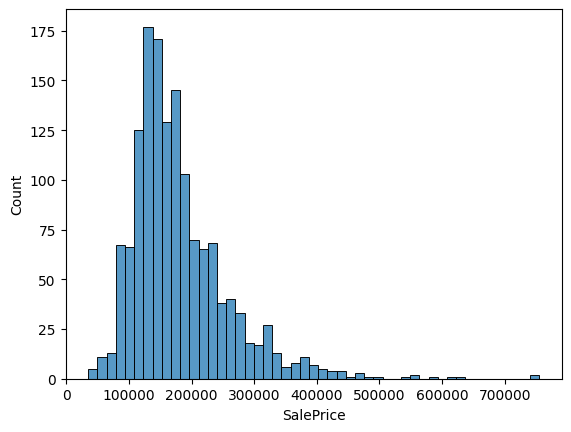

In [22]:
sns.histplot(df.SalePrice)

#Log

In [24]:
df["log_SalePrice"] = np.log10(df.SalePrice)
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,log_SalePrice
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,5.319106
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,5.258877
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,5.349278
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,5.146128
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,5.397940


<Axes: xlabel='log_SalePrice', ylabel='Count'>

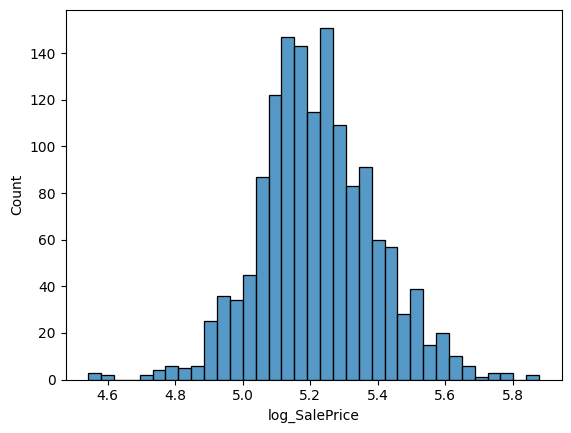

In [25]:
sns.histplot(df.log_SalePrice)

In [26]:
from scipy.stats import skew
skew(df.log_SalePrice)

0.12121036730137286

## Box Cox

In [34]:
lmbda = 0.1
df["bx_SalePrice"] = (df["SalePrice"]**lmbda - 1)/lmbda
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,log_SalePrice,bx_SalePrice
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,5.319106,24.033813
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,5.258877,23.565078
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,5.349278,24.271077
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,5.146128,22.704898
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,5.397940,24.657242


<Axes: xlabel='bx_SalePrice', ylabel='Count'>

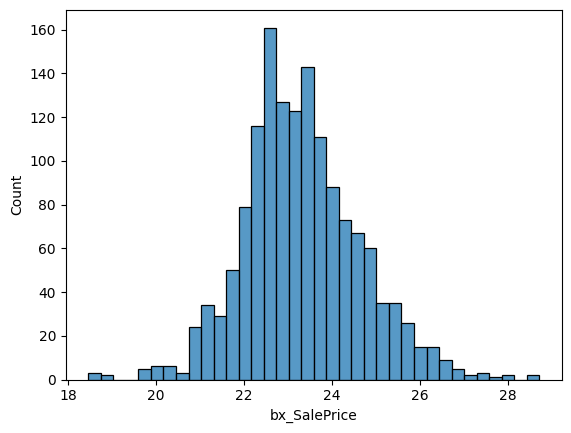

In [35]:
sns.histplot(df.bx_SalePrice)

In [36]:
skew(df.bx_SalePrice)

0.28641751364562007